# Introdução à análise de risco

## Valor Esperado da Utilidade

In [2]:
# https://colab.research.google.com/drive/1FUei2qXoBaxWI4kr7FqRzgUDETVqDzvS?usp=sharing
import numpy as np

# quantidade de ações
vet_a = np.linspace(0,10,num = 11)
vet_b = np.linspace(0,10,num = 11)

# custos das ações
custo_a = 10
custo_b = 10

# resolvendo por força bruta
flag  = 0
for a in vet_a: # para cada valor de vet_a faça...
    for b in vet_b: #para cada valor de vet_b faça...

        # só executa o cálculo de a restrição de custo for atendida
        if (a * custo_a) + (b * custo_b) <= 100:
            # cálculo cenário 1
            rendimento_cenario_1 = (a * 15) + (b * 5) - (a * custo_a) - (b * custo_b)
            if rendimento_cenario_1 >= 0: # se o rendimento do cenário for menor que 1, não calcula
                funcao_utilidade_cenario_1 = np.sqrt(rendimento_cenario_1)
            else:
                funcao_utilidade_cenario_1 = 0

            # cálculo cenário 2
            rendimento_cenario_2 = (a * 5) + (b * 12) - (a * custo_a) - (b * custo_b)
            if rendimento_cenario_2 >= 0: # se o rendimento do cenário for menor que 1, não calcula
                funcao_utilidade_cenario_2 = np.sqrt(rendimento_cenario_2)
            else:
                funcao_utilidade_cenario_2 = 0

            # cálculo do valor esperado
            valor_esperado_funcao_utilidade = (0.5 * funcao_utilidade_cenario_1) + \
                (0.5 * funcao_utilidade_cenario_2)

            # só imprime o valor esperado se ele for maior que o valor esperado anterior
            if valor_esperado_funcao_utilidade > flag:
                print("a:", a)
                print("b:", b)
                print("valor_esperado_funcao_utilidade:", valor_esperado_funcao_utilidade)
                print()
                flag = valor_esperado_funcao_utilidade


a: 0.0
b: 1.0
valor_esperado_funcao_utilidade: 0.7071067811865476

a: 0.0
b: 2.0
valor_esperado_funcao_utilidade: 1.0

a: 0.0
b: 3.0
valor_esperado_funcao_utilidade: 1.224744871391589

a: 0.0
b: 4.0
valor_esperado_funcao_utilidade: 1.4142135623730951

a: 0.0
b: 5.0
valor_esperado_funcao_utilidade: 1.5811388300841898

a: 0.0
b: 6.0
valor_esperado_funcao_utilidade: 1.7320508075688772

a: 0.0
b: 7.0
valor_esperado_funcao_utilidade: 1.8708286933869707

a: 0.0
b: 8.0
valor_esperado_funcao_utilidade: 2.0

a: 0.0
b: 9.0
valor_esperado_funcao_utilidade: 2.1213203435596424

a: 0.0
b: 10.0
valor_esperado_funcao_utilidade: 2.23606797749979

a: 5.0
b: 0.0
valor_esperado_funcao_utilidade: 2.5

a: 6.0
b: 0.0
valor_esperado_funcao_utilidade: 2.7386127875258306

a: 7.0
b: 0.0
valor_esperado_funcao_utilidade: 2.958039891549808

a: 8.0
b: 0.0
valor_esperado_funcao_utilidade: 3.1622776601683795

a: 9.0
b: 0.0
valor_esperado_funcao_utilidade: 3.3541019662496847

a: 10.0
b: 0.0
valor_esperado_funcao_utilid

## Otimização de Portfólio de Markowitz - 2

In [3]:
# Three securities were selected: Microsoft, Dell, and General Electric (G.E.).
# The monthly returns from investing in each security are shown
# 
# Plot the “expected return” versus “standard deviation” (aka risk/return graph) 
# from each of three securities (Microsoft, Dell, and General Electric (G.E.) 
# and a portfolio composed of 50% Dell and 50% G.E.
#
# Finally plot risk/return graph for 4000 Portfolios.

import numpy as np
import matplotlib.pyplot as plt

# The monthly returns of 3 securities were selected: 
# Microsoft, Dell, and General Electric (G.E.)
list1 = [[-0.66, -2.88, 10.11],
[-3.55, 20.29, 4.57],
[-4.48, -8.34, -4.16],
[2.09, 6.62, 2.00],
[-2.89, 3.94, -3.96],
[3.96, 3.67, -3.21],
[5.38, -2.58, -5.04],
[-2.34, -8.47, -8.93],
[-6.43, -4.88, -5.76],
[6.99, 11.81, 9.79],
[-3.19, -0.32, -4.79],
[1.49, -7.17, 13.64]]

data_np = np.array(list1) # transforma a lista de listas em uma matriz numpy
data_1 = data_np / 100 # corrige os valores percentuais para decimais

# cálculo do valor médio do retorno
Return_Micro = np.mean(data_1[:,0])
Return_Dell = np.mean(data_1[:,1])
Return_GE = np.mean(data_1[:,2])

# cálculo do desvio padrão
std_Micro = np.std(data_1[:,0])
std_Dell = np.std(data_1[:,1])
std_GE = np.std(data_1[:,2])

# imprime os retornos médios
print()
print('Return_Micro = {:.4f}'.format(Return_Micro))
print('Return_Dell = {:.4f}'.format(Return_Dell))
print('Return_GE = {:.4f}'.format(Return_GE))

# imprime os devios padrão
print()
print('Standard_Deviation_Micro = {:.4f}'.format(std_Micro))
print('Standard_Deviation_Dell = {:.4f}'.format(std_Dell))
print('Standard_Deviation_GE = {:.4f}'.format(std_GE))


Return_Micro = -0.0030
Return_Dell = 0.0097
Return_GE = 0.0035

Standard_Deviation_Micro = 0.0406
Standard_Deviation_Dell = 0.0839
Standard_Deviation_GE = 0.0714


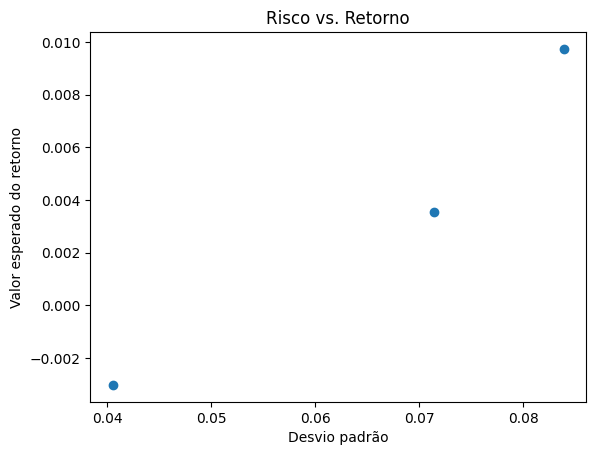

In [4]:
x = [std_Micro,std_Dell,std_GE] # vetor do desvio padrão
y = [Return_Micro,Return_Dell,Return_GE] # vetor do retorno esperado

plt.scatter(x, y)
plt.title('Risco vs. Retorno')
plt.xlabel('Desvio padrão')
plt.ylabel('Valor esperado do retorno')
plt.show()

Return_Carteira_1: 0.0066
std_Carteira_1: 0.0627


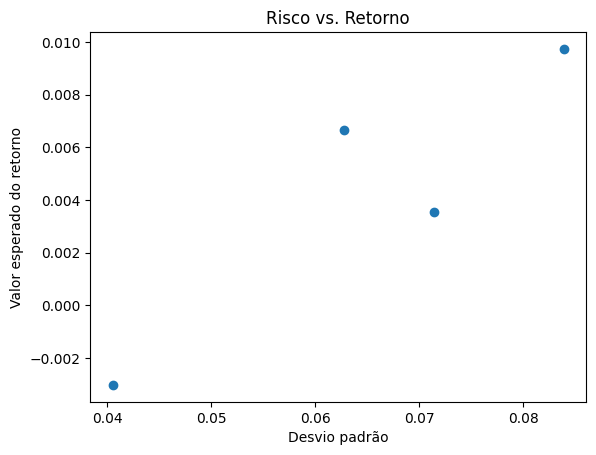

In [5]:
# Carteira 50% DELL + 50% GE
Carteira_1 = np.ones(12)

for mes in range(12):
    Carteira_1[mes] = (data_1[mes,1] + data_1[mes,2]) / 2 # metade do orçamento está em DELL(1) e metade em GE(2)


Return_Carteira_1 = np.mean(Carteira_1)
std_Carteira_1 = np.std(Carteira_1)

x = [std_Micro,std_Dell,std_GE,std_Carteira_1] # vetor do desvio padrão
y = [Return_Micro,Return_Dell,Return_GE,Return_Carteira_1] # vetor do retorno esperado

print("Return_Carteira_1: {:.4f}".format(Return_Carteira_1))
print("std_Carteira_1: {:.4f}".format(std_Carteira_1))

plt.scatter(x, y)
plt.title('Risco vs. Retorno')
plt.xlabel('Desvio padrão')
plt.ylabel('Valor esperado do retorno')
plt.show()

Carteiras: 4095


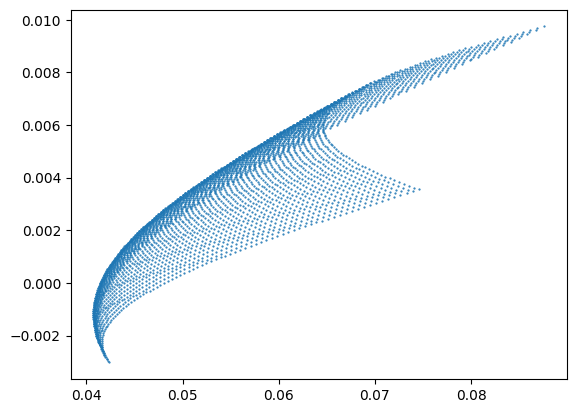

In [6]:
# Código do Marcelo Bacchetti

def desvio_carteira(carteira, matriz_cov):
    varianca_carteira = 0
    for i in range(3):
        for j in range(3):
            var2 = carteira[j] * carteira[i] * matriz_cov[i, j]
            varianca_carteira = var2 + varianca_carteira
    return np.sqrt(varianca_carteira)

portifolios = []
n = 90
for a in np.linspace(0, 1, n):
    for b in np.linspace(0, 1, n):
        c = 1 - (a+b)
        if c >= 0:
            portifolios.append((a, b, c))

matriz_cov = np.cov(data_1, rowvar=False)

plan = []
for p in portifolios:
    dev = desvio_carteira(p, matriz_cov)
    ret = (p * data_1.mean(0)).sum()
    plan.append((dev, ret))

print(f"Carteiras: {len(plan)}")
plt.scatter(*zip(*plan), s=0.3);